# Keyword Cannibalization Detector Demo

This notebook demonstrates how to use the Keyword Cannibalization Detector with different configurations and examples.

In [1]:
import pandas as pd
import numpy as np
from keyword_cannibalization import run_cannibalization_analysis
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

C:\Users\dadash\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Create Sample Data

Let's create some sample data with potential keyword cannibalization issues.

In [4]:
# Create sample data
data = {
    'Title': [
        'How to Make Persian Rice',
        'Persian Rice Recipe',
        'Best Persian Rice Cooking Guide',
        'SEO Tips for Beginners',
        'Beginner SEO Guide',
        'Complete SEO Guide for Beginners',
        'Digital Marketing Strategies',
        'Effective Digital Marketing Tips',
        'Digital Marketing Guide 2024',
        'Content Marketing Basics',
        'Content Marketing Guide',
        'Content Marketing Strategies'
    ],
    'Permalink': [
        '/recipes/persian-rice',
        '/recipes/persian-rice-recipe',
        '/recipes/best-persian-rice',
        '/seo/beginner-tips',
        '/seo/guide-beginners',
        '/seo/complete-guide',
        '/marketing/digital-strategies',
        '/marketing/digital-tips',
        '/marketing/guide-2024',
        '/marketing/content-basics',
        '/marketing/content-guide',
        '/marketing/content-strategies'
    ]
}

df = pd.DataFrame(data)
display(df)

,Title,Permalink
0,How to Make Persian Rice,/recipes/persian-rice
1,Persian Rice Recipe,/recipes/persian-rice-recipe
2,Best Persian Rice Cooking Guide,/recipes/best-persian-rice
3,SEO Tips for Beginners,/seo/beginner-tips
4,Beginner SEO Guide,/seo/guide-beginners
5,Complete SEO Guide for Beginners,/seo/complete-guide
6,Digital Marketing Strategies,/marketing/digital-strategies
7,Effective Digital Marketing Tips,/marketing/digital-tips
8,Digital Marketing Guide 2024,/marketing/guide-2024
9,Content Marketing Basics,/marketing/content-basics


## 2. Basic Analysis with TF-IDF

Let's run a basic analysis using TF-IDF for both title and URL comparison.

In [7]:
# Run basic analysis
results_df, analysis_data = run_cannibalization_analysis(
    df=df,
    title_method='tfidf',
    url_method='tfidf',
    title_threshold=0.7,
    url_threshold=0.7,
    use_persian_preprocessing=True
)

print(f"Found {len(results_df)} potential keyword cannibalization issues")
display(results_df)

2025-05-29 20:23:45,699 - INFO - Initialized with methods - Title: tfidf, URL: tfidf
2025-05-29 20:23:45,701 - INFO - Persian preprocessing: enabled
2025-05-29 20:23:45,701 - INFO - Standardizing column names...
2025-05-29 20:23:45,701 - INFO - Processing 12 rows...
2025-05-29 20:23:45,701 - INFO - Applying Persian text preprocessing to titles...
2025-05-29 20:23:45,709 - INFO - After preprocessing: 12 valid rows
2025-05-29 20:23:45,709 - INFO - Computing title similarities using tfidf...
2025-05-29 20:23:45,709 - INFO - Calculating similarities using tfidf for 12 items...
2025-05-29 20:23:45,713 - INFO - Computing URL similarities using tfidf...
2025-05-29 20:23:45,713 - INFO - Calculating similarities using tfidf for 12 items...


Found 0 potential keyword cannibalization issues


""


## 3. Analysis with Sentence Transformers

Now let's try using Sentence Transformers for better semantic understanding.

In [6]:
# Run analysis with Sentence Transformers
results_df, analysis_data = run_cannibalization_analysis(
    df=df,
    title_method='sentence_transformers',
    url_method='thefuzz',
    title_threshold=0.7,
    url_threshold=0.7,
    use_persian_preprocessing=True,
    sentence_model='jinaai/jina-reranker-v2-base-multilingual'
)

print(f"Found {len(results_df)} potential keyword cannibalization issues")
display(results_df)

2025-05-29 20:25:50,907 - INFO - Loading Sentence Transformer model: jinaai/jina-reranker-v2-base-multilingual
2025-05-29 20:25:50,910 - INFO - Use pytorch device_name: cuda:0
2025-05-29 20:25:50,911 - INFO - Load pretrained SentenceTransformer: jinaai/jina-reranker-v2-base-multilingual
2025-05-29 20:25:51,174 - WARNING - No sentence-transformers model found with name jinaai/jina-reranker-v2-base-multilingual. Creating a new one with mean pooling.
2025-05-29 20:25:52,325 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:25:52,327 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:25:52,328 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:25:52,330 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:25:52,331 - WARNING - flash_attn is not installed. Using PyTorch native attention impl

Found 66 potential keyword cannibalization issues


,Title_1,Title_2,Permalink_1,Permalink_2,Category,Title_Similarity,Param_Similarity,Title_Method,URL_Method,Cannibalization_Type
30,SEO Tips for Beginners,Beginner SEO Guide,/seo/beginner-tips,/seo/guide-beginners,main,99.97%,64.00%,sentence_transformers,thefuzz,Title Only
65,Content Marketing Guide,Content Marketing Strategies,/marketing/content-guide,/marketing/content-strategies,main,99.95%,71.00%,sentence_transformers,thefuzz,Both Title & URL
38,Beginner SEO Guide,Complete SEO Guide for Beginners,/seo/guide-beginners,/seo/complete-guide,main,99.93%,34.00%,sentence_transformers,thefuzz,Title Only
59,Effective Digital Marketing Tips,Content Marketing Strategies,/marketing/digital-tips,/marketing/content-strategies,main,99.93%,33.00%,sentence_transformers,thefuzz,Title Only
31,SEO Tips for Beginners,Complete SEO Guide for Beginners,/seo/beginner-tips,/seo/complete-guide,main,99.93%,30.00%,sentence_transformers,thefuzz,Title Only
...,...,...,...,...,...,...,...,...,...,...
3,How to Make Persian Rice,Beginner SEO Guide,/recipes/persian-rice,/seo/guide-beginners,main,92.10%,30.00%,sentence_transformers,thefuzz,Title Only
2,How to Make Persian Rice,SEO Tips for Beginners,/recipes/persian-rice,/seo/beginner-tips,main,91.86%,40.00%,sentence_transformers,thefuzz,Title Only
4,How to Make Persian Rice,Complete SEO Guide for Beginners,/recipes/persian-rice,/seo/complete-guide,main,91.56%,38.00%,sentence_transformers,thefuzz,Title Only
5,How to Make Persian Rice,Digital Marketing Strategies,/recipes/persian-rice,/marketing/digital-strategies,main,91.48%,40.00%,sentence_transformers,thefuzz,Title Only


## 4. Visualizing Similarity Matrices

Let's visualize the similarity matrices to better understand the relationships between content.

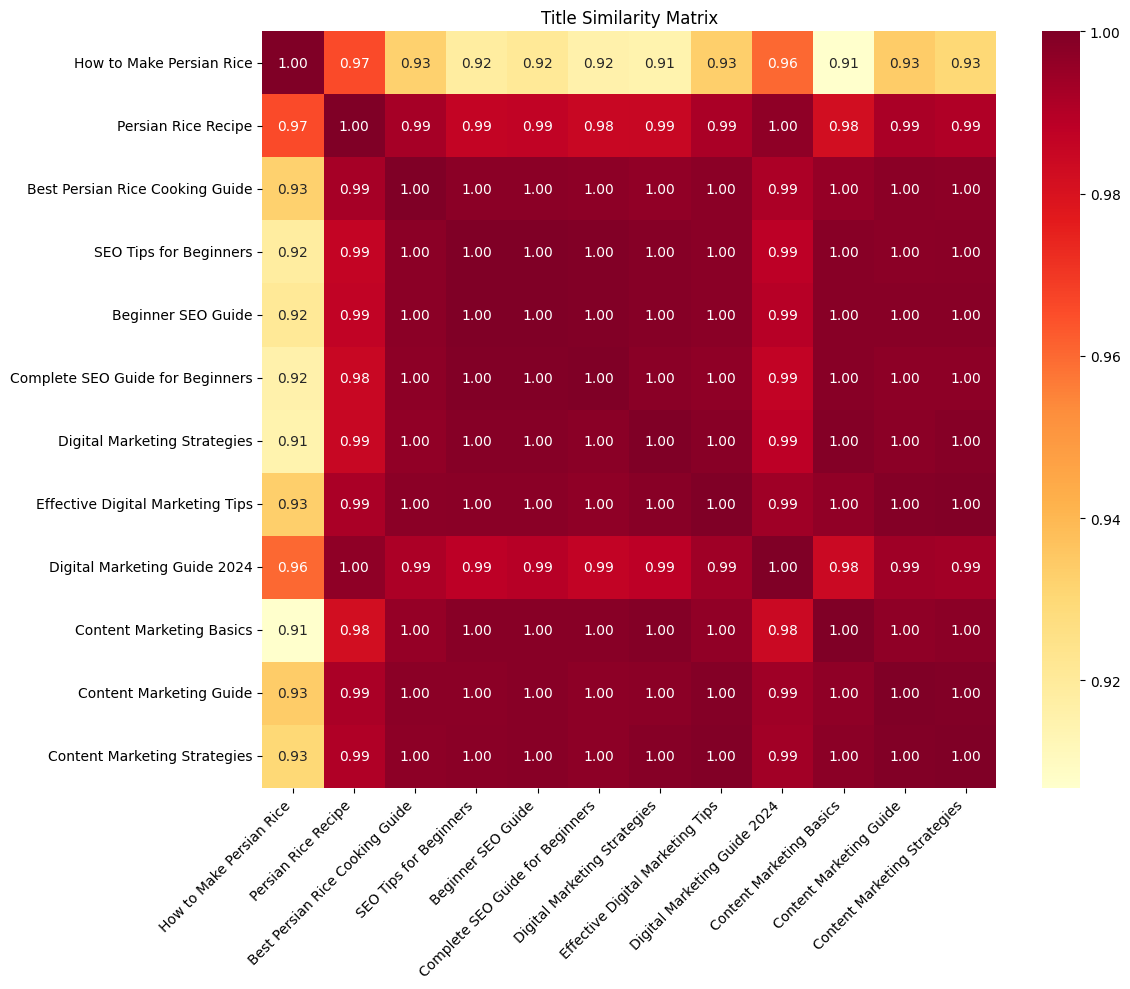

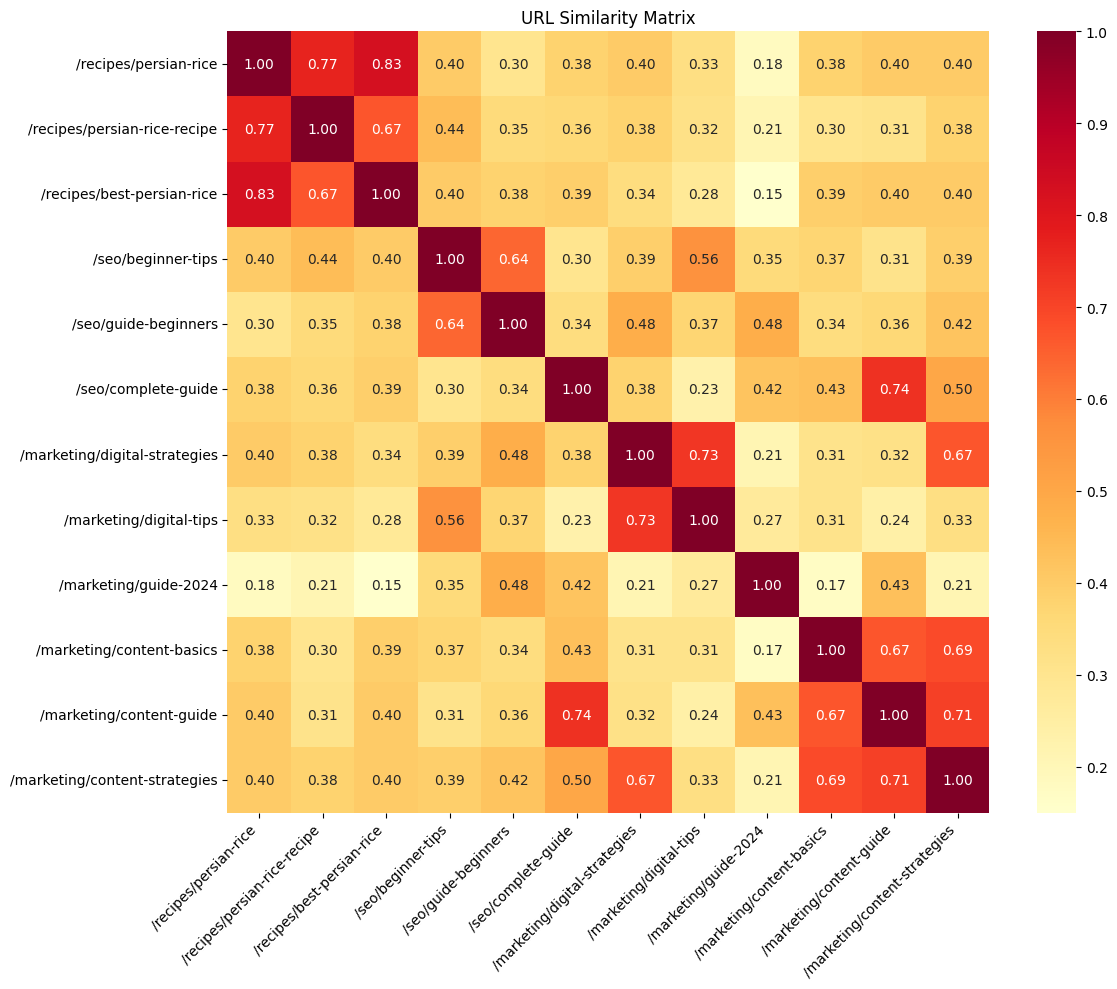

In [7]:
def plot_similarity_matrix(matrix, titles, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=titles, yticklabels=titles)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Get similarity matrices from the last analysis
title_sim_matrix = analysis_data['title_similarity_matrix']
param_sim_matrix = analysis_data['param_similarity_matrix']

# Plot matrices
plot_similarity_matrix(title_sim_matrix, df['Title'], 'Title Similarity Matrix')
plot_similarity_matrix(param_sim_matrix, df['Permalink'], 'URL Similarity Matrix')

## 5. Comparing Different Methods

Let's compare results from different similarity methods.

2025-05-29 20:27:11,641 - INFO - Initialized with methods - Title: tfidf, URL: thefuzz
2025-05-29 20:27:11,641 - INFO - Persian preprocessing: enabled
2025-05-29 20:27:11,641 - INFO - Standardizing column names...
2025-05-29 20:27:11,643 - INFO - Processing 12 rows...
2025-05-29 20:27:11,643 - INFO - Applying Persian text preprocessing to titles...
2025-05-29 20:27:11,645 - INFO - After preprocessing: 12 valid rows
2025-05-29 20:27:11,647 - INFO - Computing title similarities using tfidf...
2025-05-29 20:27:11,647 - INFO - Calculating similarities using tfidf for 12 items...
2025-05-29 20:27:11,650 - INFO - Computing URL similarities using thefuzz...
2025-05-29 20:27:11,650 - INFO - Calculating similarities using thefuzz for 12 items...
2025-05-29 20:27:11,676 - INFO - Loading Sentence Transformer model: jinaai/jina-reranker-v2-base-multilingual
2025-05-29 20:27:11,679 - INFO - Use pytorch device_name: cuda:0
2025-05-29 20:27:11,679 - INFO - Load pretrained SentenceTransformer: jinaai/

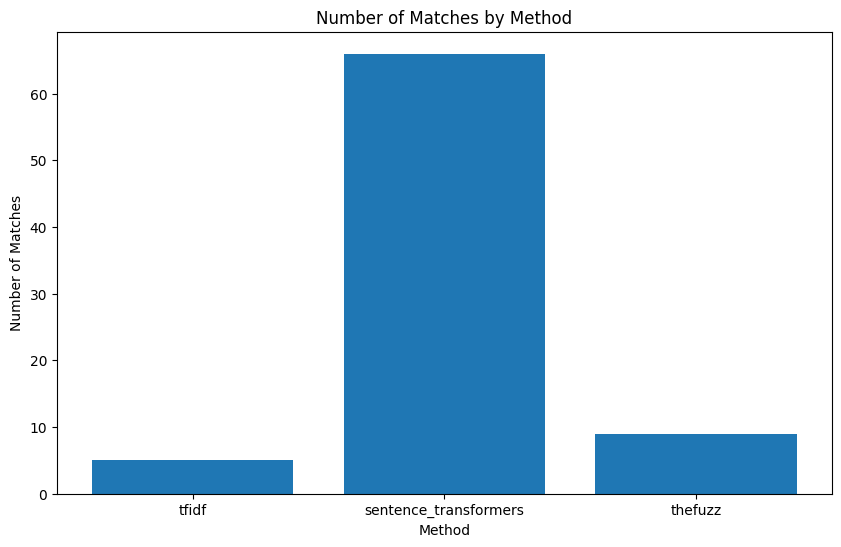

In [9]:
def run_comparison_analysis(method):
    results_df, _ = run_cannibalization_analysis(
        df=df,
        title_method=method,
        url_method='thefuzz',
        title_threshold=0.7,
        url_threshold=0.7,
        use_persian_preprocessing=True,
        sentence_model="jinaai/jina-reranker-v2-base-multilingual"
    )
    return len(results_df)

# Compare different methods
methods = ['tfidf', 'sentence_transformers', 'thefuzz']
results = {method: run_comparison_analysis(method) for method in methods}

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Number of Matches by Method')
plt.xlabel('Method')
plt.ylabel('Number of Matches')
plt.show()

## 6. Testing with Persian Content

Let's test the detector with Persian content to see how it handles different languages.

In [10]:
# Create Persian sample data
persian_data = {
    'Title': [
        'طرز تهیه برنج ایرانی',
        'دستور پخت برنج ایرانی',
        'بهترین روش پخت برنج ایرانی',
        'نکات سئو برای مبتدیان',
        'راهنمای سئو برای مبتدیان',
        'راهنمای کامل سئو'
    ],
    'Permalink': [
        '/recipes/persian-rice',
        '/recipes/persian-rice-recipe',
        '/recipes/best-persian-rice',
        '/seo/beginner-tips',
        '/seo/guide-beginners',
        '/seo/complete-guide'
    ]
}

persian_df = pd.DataFrame(persian_data)
display(persian_df)

# Run analysis with Persian content
results_df, _ = run_cannibalization_analysis(
    df=persian_df,
    title_method='sentence_transformers',
    url_method='thefuzz',
    title_threshold=0.7,
    url_threshold=0.7,
    use_persian_preprocessing=True,
    sentence_model='jinaai/jina-reranker-v2-base-multilingual'
)

print(f"Found {len(results_df)} potential keyword cannibalization issues")
display(results_df)

,Title,Permalink
0,طرز تهیه برنج ایرانی,/recipes/persian-rice
1,دستور پخت برنج ایرانی,/recipes/persian-rice-recipe
2,بهترین روش پخت برنج ایرانی,/recipes/best-persian-rice
3,نکات سئو برای مبتدیان,/seo/beginner-tips
4,راهنمای سئو برای مبتدیان,/seo/guide-beginners
5,راهنمای کامل سئو,/seo/complete-guide


2025-05-29 20:27:30,019 - INFO - Loading Sentence Transformer model: jinaai/jina-reranker-v2-base-multilingual
2025-05-29 20:27:30,022 - INFO - Use pytorch device_name: cuda:0
2025-05-29 20:27:30,022 - INFO - Load pretrained SentenceTransformer: jinaai/jina-reranker-v2-base-multilingual
2025-05-29 20:27:30,318 - WARNING - No sentence-transformers model found with name jinaai/jina-reranker-v2-base-multilingual. Creating a new one with mean pooling.
2025-05-29 20:27:31,503 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:27:31,503 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:27:31,505 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:27:31,507 - WARNING - flash_attn is not installed. Using PyTorch native attention implementation.
2025-05-29 20:27:31,509 - WARNING - flash_attn is not installed. Using PyTorch native attention impl

Found 15 potential keyword cannibalization issues


,Title_1,Title_2,Permalink_1,Permalink_2,Category,Title_Similarity,Param_Similarity,Title_Method,URL_Method,Cannibalization_Type
0,طرز تهیه برنج ایرانی,دستور پخت برنج ایرانی,/recipes/persian-rice,/recipes/persian-rice-recipe,main,99.95%,77.00%,sentence_transformers,thefuzz,Both Title & URL
12,نکات سئو برای مبتدیان,راهنمای سئو برای مبتدیان,/seo/beginner-tips,/seo/guide-beginners,main,99.84%,64.00%,sentence_transformers,thefuzz,Title Only
7,دستور پخت برنج ایرانی,راهنمای سئو برای مبتدیان,/recipes/persian-rice-recipe,/seo/guide-beginners,main,99.81%,35.00%,sentence_transformers,thefuzz,Title Only
3,طرز تهیه برنج ایرانی,راهنمای سئو برای مبتدیان,/recipes/persian-rice,/seo/guide-beginners,main,99.80%,30.00%,sentence_transformers,thefuzz,Title Only
6,دستور پخت برنج ایرانی,نکات سئو برای مبتدیان,/recipes/persian-rice-recipe,/seo/beginner-tips,main,99.71%,44.00%,sentence_transformers,thefuzz,Title Only
2,طرز تهیه برنج ایرانی,نکات سئو برای مبتدیان,/recipes/persian-rice,/seo/beginner-tips,main,99.63%,40.00%,sentence_transformers,thefuzz,Title Only
14,راهنمای سئو برای مبتدیان,راهنمای کامل سئو,/seo/guide-beginners,/seo/complete-guide,main,99.60%,34.00%,sentence_transformers,thefuzz,Title Only
4,طرز تهیه برنج ایرانی,راهنمای کامل سئو,/recipes/persian-rice,/seo/complete-guide,main,99.54%,38.00%,sentence_transformers,thefuzz,Title Only
8,دستور پخت برنج ایرانی,راهنمای کامل سئو,/recipes/persian-rice-recipe,/seo/complete-guide,main,99.41%,36.00%,sentence_transformers,thefuzz,Title Only
9,بهترین روش پخت برنج ایرانی,نکات سئو برای مبتدیان,/recipes/best-persian-rice,/seo/beginner-tips,main,99.23%,40.00%,sentence_transformers,thefuzz,Title Only


## 7. Performance Analysis

Let's analyze the performance of different methods with varying dataset sizes.

2025-05-29 20:28:02,022 - INFO - Initialized with methods - Title: tfidf, URL: thefuzz
2025-05-29 20:28:02,022 - INFO - Persian preprocessing: enabled
2025-05-29 20:28:02,022 - INFO - Standardizing column names...
2025-05-29 20:28:02,024 - INFO - Processing 10 rows...
2025-05-29 20:28:02,024 - INFO - Applying Persian text preprocessing to titles...
2025-05-29 20:28:02,026 - INFO - After preprocessing: 10 valid rows
2025-05-29 20:28:02,028 - INFO - Computing title similarities using tfidf...
2025-05-29 20:28:02,028 - INFO - Calculating similarities using tfidf for 10 items...
2025-05-29 20:28:02,030 - INFO - Computing URL similarities using thefuzz...
2025-05-29 20:28:02,030 - INFO - Calculating similarities using thefuzz for 10 items...
2025-05-29 20:28:03,317 - INFO - Initialized with methods - Title: tfidf, URL: thefuzz
2025-05-29 20:28:03,319 - INFO - Persian preprocessing: enabled
2025-05-29 20:28:03,319 - INFO - Standardizing column names...
2025-05-29 20:28:03,319 - INFO - Proces

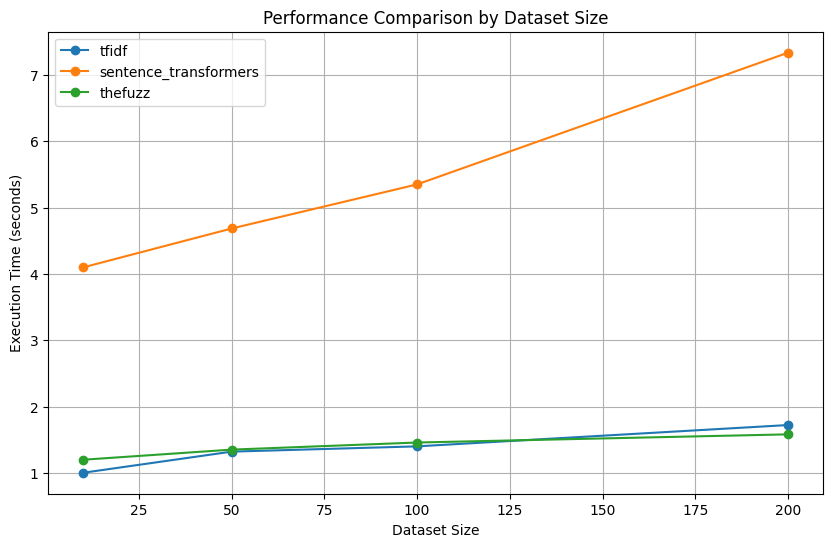

In [12]:
import time

def measure_performance(method, df):
    start_time = time.time()
    run_cannibalization_analysis(
        df=df,
        title_method=method,
        url_method='thefuzz',
        title_threshold=0.7,
        url_threshold=0.7,
        sentence_model="jinaai/jina-reranker-v2-base-multilingual"
    )
    return time.time() - start_time

# Test with different dataset sizes
sizes = [10, 50, 100, 200]
methods = ['tfidf', 'sentence_transformers', 'thefuzz']

performance_data = {}
for method in methods:
    times = []
    for size in sizes:
        # Create larger dataset by repeating the original data
        test_df = pd.concat([df] * (size // len(df) + 1)).head(size)
        execution_time = measure_performance(method, test_df)
        times.append(execution_time)
    performance_data[method] = times

# Plot performance results
plt.figure(figsize=(10, 6))
for method, times in performance_data.items():
    plt.plot(sizes, times, marker='o', label=method)

plt.title('Performance Comparison by Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()